# Student Performance Indicator

# 1. Problem Statement
- From the supplied data we need to find out the impact of Gender, Ethinicity, Parental level of Education, Lunch and Test prepration course on the test score of the student.

# 2. Data Collection
- Kaggle
- The Data consists of 8 columns and 1000 rows.

Import Required Packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the data 
df = pd.read_csv('data/stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 3. Data Checks to perform
- Missing Value
- Duplicate Value
- Data type 
- Number of unique value in each columns 
- Statistics of Data
- Categories present in different categorical columns

# 3.1. Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing value in the columns.

# 3.2 Checking Duplicates 

In [7]:
df.duplicated().sum()

0

There is no duplicate value present in the dataset.

# 3.3 Check Data Type 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 3.4 Number of Unique values

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# 3.5 Check Statistics

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- Insights 
    - All Means of Numerical data are close enough (66.08900 to 69.169000)
    - Standard Deviation is varying from 14.6 to 15.16.
    - Minimum socre is having great variability from 0 of math_score , 10 of writting score and 17 of reading score. 

# 3.6 Exploring the Data 

In [11]:
print('Categories in Gender variable :', end = ' ')
print(df['gender'].unique())

print('Categories in Race/Ethenicity variable :', end = ' ')
print(df['race_ethnicity'].unique())

print('Categories in Parental Level of Education variable :', end = ' ')
print(df['parental_level_of_education'].unique())

print('Categories in Lunch  variable :', end = ' ')
print(df['lunch'].unique())

print('Categories in Test Preparation Course  variable :', end = ' ')
print(df['test_preparation_course'].unique())



Categories in Gender variable : ['female' 'male']
Categories in Race/Ethenicity variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in Parental Level of Education variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in Lunch  variable : ['standard' 'free/reduced']
Categories in Test Preparation Course  variable : ['none' 'completed']


In [12]:
# Define Categorical and Numerical Feature data subset 
numerical = [feature for feature in  df.columns if df[feature].dtypes!="O" ]
categorical = [feature for feature in  df.columns if df[feature].dtypes=="O" ]

print(f'We have {len(numerical)} Numerical features : {numerical}')
print(f'We have {len(categorical)} Categorical features : {categorical}')

We have 3 Numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 Categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# 3.8 Adding Total Score and Average Score Columns

In [13]:
df['Total Score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Average Score'] = df['Total Score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading_score']==100]['Average Score'].count()
maths_full = df[df['math_score']==100]['Average Score'].count()
writting_full = df[df['writing_score']==100]['Average Score'].count()

print(f'Number of students with full marks in Maths : {maths_full}')
print(f'Number of students with full marks in Reading : {reading_full}')
print(f'Number of students with full marks in Writting : {writting_full}')

Number of students with full marks in Maths : 7
Number of students with full marks in Reading : 17
Number of students with full marks in Writting : 14


In [15]:
reading_less_20 = df[df['reading_score']<20]['Average Score'].count()
maths_less_20 = df[df['math_score']<20]['Average Score'].count()
writting_less_20 = df[df['writing_score']<20]['Average Score'].count()

print(f'Number of students with marks less than 20 in Maths : {maths_less_20}')
print(f'Number of students with marks less than 20 in Reading : {reading_less_20}')
print(f'Number of students with marks less than 20 in Writting : {writting_less_20}')

Number of students with marks less than 20 in Maths : 4
Number of students with marks less than 20 in Reading : 1
Number of students with marks less than 20 in Writting : 3


- Insights 
    - Student are performing good in Reading section
    - Studnet are having bad performance in Maths Section

# 4 Data Exploration - Visualization 

# 4.1 Analysis of Average Marks
    - KDE Plor
    - Histogram

<Axes: xlabel='Average Score', ylabel='Count'>

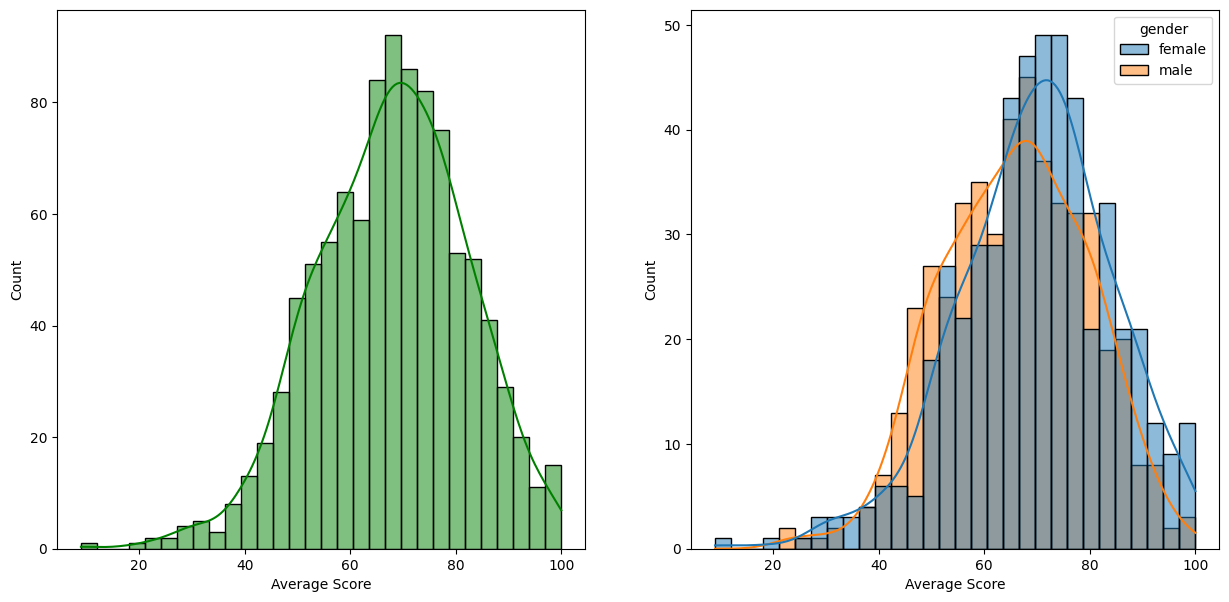

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'Average Score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x = 'Average Score', bins=30, kde=True, hue= 'gender')

- Insight
    - Females are performing well based on above visualization.

<Axes: xlabel='Total Score', ylabel='Count'>

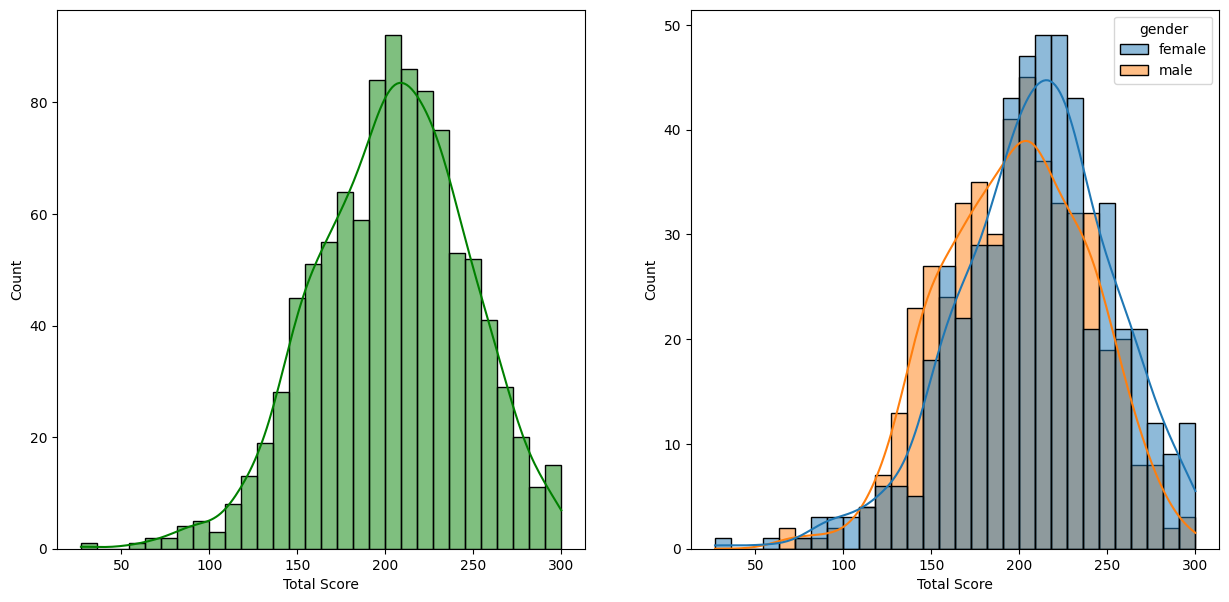

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'Total Score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x = 'Total Score', bins=30, kde=True, hue= 'gender')

<Axes: title={'center': 'Female data'}, xlabel='Average Score', ylabel='Count'>

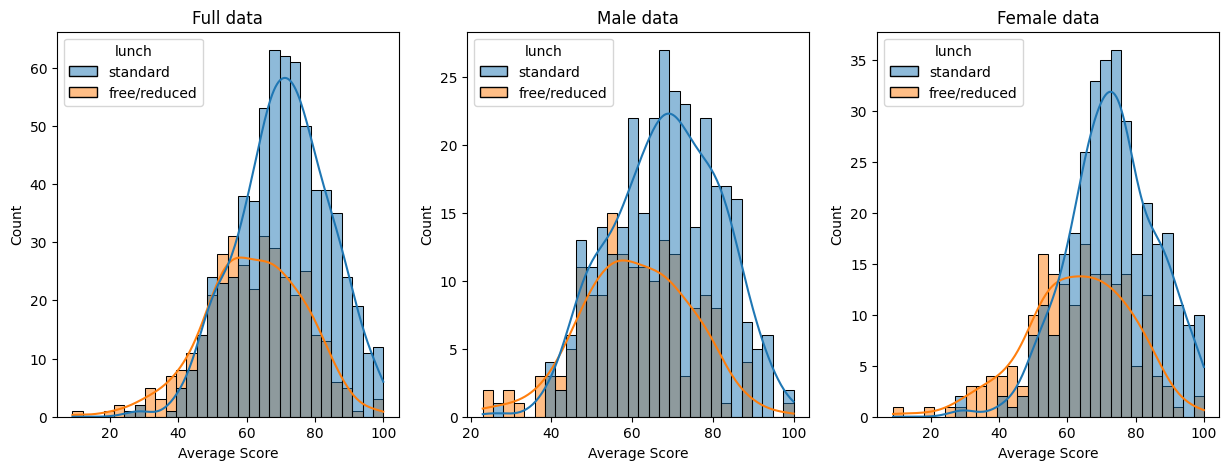

In [28]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
plt.subplot(131)
ax[0].set_title("Full data")
sns.histplot(data=df, x = 'Average Score', bins=30, kde=True, hue=df['lunch'])
plt.subplot(132)
ax[1].set_title("Male data")
sns.histplot(data=df[df['gender']=='male'], x = 'Average Score', bins=30, kde=True, hue= df['lunch'])
plt.subplot(133)
ax[2].set_title("Female data")
sns.histplot(data=df[df['gender']=='female'], x = 'Average Score', bins=30, kde=True, hue= df['lunch'])



- Insights 
    - Irrespective of Gender the Average score of students having Standard Lunch are performing well.
    

<Axes: title={'center': 'Female data'}, xlabel='Average Score', ylabel='Count'>

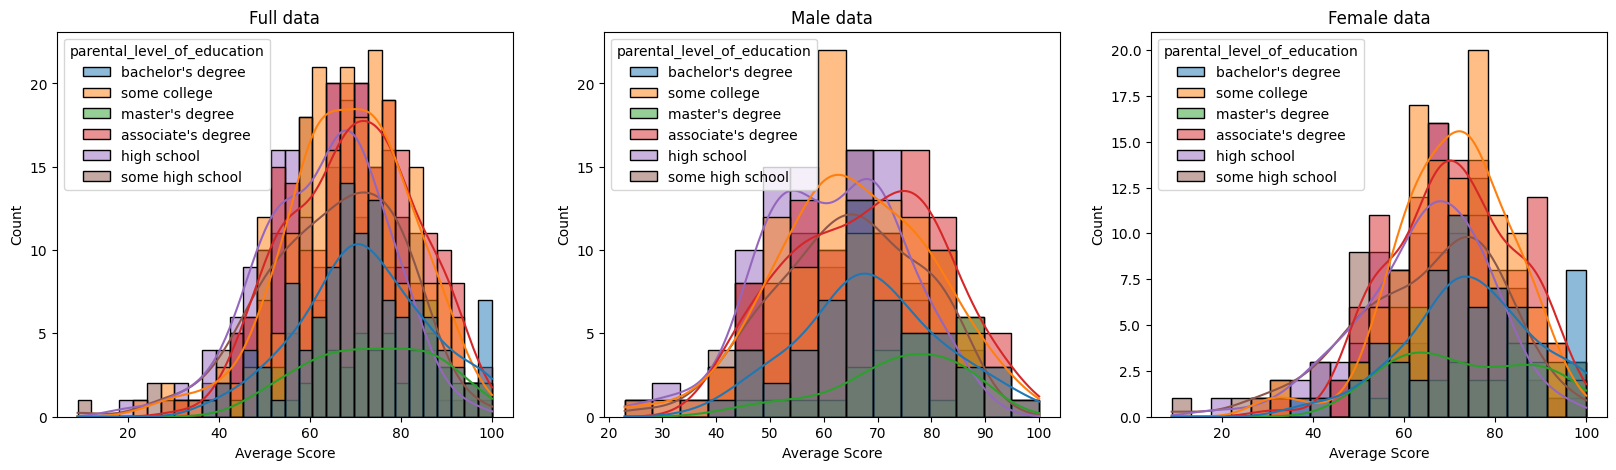

In [31]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
plt.subplot(131)
ax[0].set_title("Full data")
sns.histplot(data=df, x = 'Average Score', bins=30, kde=True, hue=df['parental_level_of_education'])
plt.subplot(132)
ax[1].set_title("Male data")
sns.histplot(data=df[df['gender']=='male'], x = 'Average Score',  kde=True, hue= df['parental_level_of_education'])
plt.subplot(133)
ax[2].set_title("Female data")
sns.histplot(data=df[df['gender']=='female'], x = 'Average Score',  kde=True, hue= df['parental_level_of_education'])



- Insights 
    - From above data we can clearly see Parental Education is not having much effect on the score of their child.

<Axes: title={'center': 'Female data'}, xlabel='Average Score', ylabel='Count'>

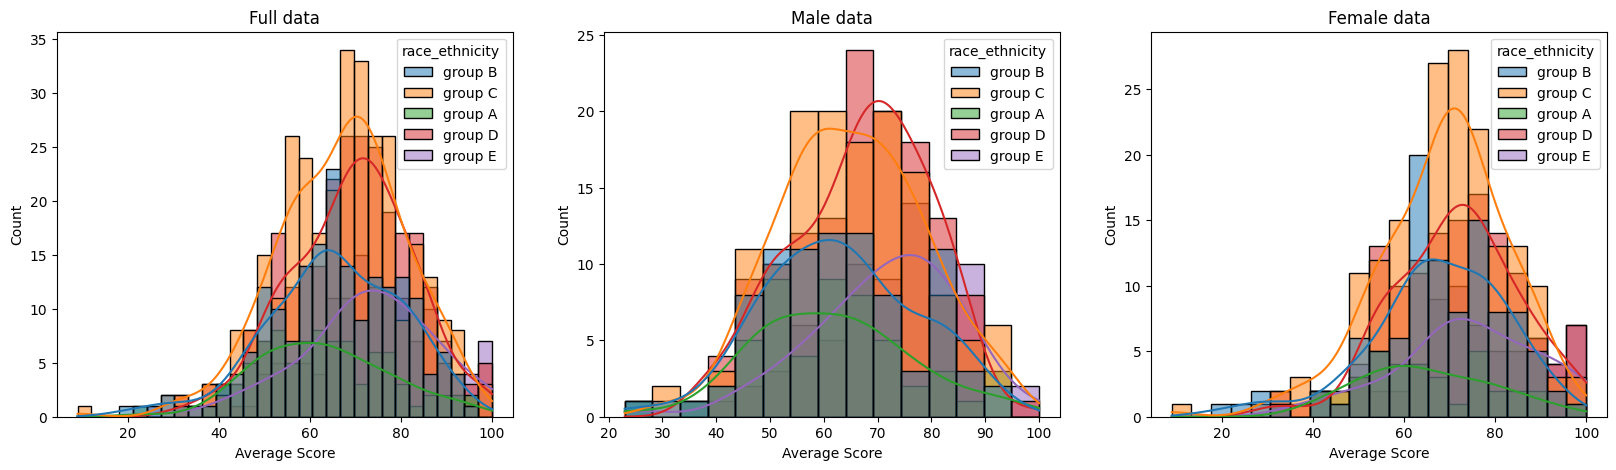

In [32]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
plt.subplot(131)
ax[0].set_title("Full data")
sns.histplot(data=df, x = 'Average Score', bins=30, kde=True, hue=df['race_ethnicity'])
plt.subplot(132)
ax[1].set_title("Male data")
sns.histplot(data=df[df['gender']=='male'], x = 'Average Score',  kde=True, hue= df['race_ethnicity'])
plt.subplot(133)
ax[2].set_title("Female data")
sns.histplot(data=df[df['gender']=='female'], x = 'Average Score',  kde=True, hue= df['race_ethnicity'])



- Insights 
    - Students from Group A and B are not performing well irrespective of gender.
    - Student from Group C is performing well irrespective of gender. There is bit variation but more or less they are perfroming well.

<Axes: title={'center': 'Female data'}, xlabel='Average Score', ylabel='Count'>

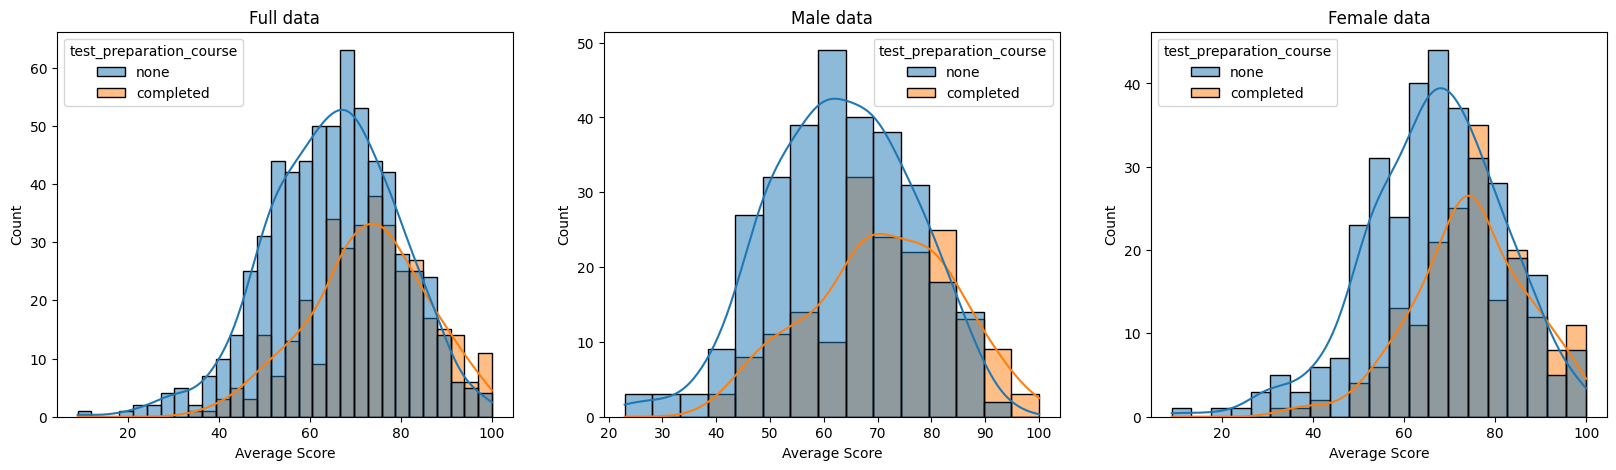

In [64]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
plt.subplot(131)
ax[0].set_title("Full data")
sns.histplot(data=df, x = 'Average Score', bins=30, kde=True, hue=df['test_preparation_course'])
plt.subplot(132)
ax[1].set_title("Male data")
sns.histplot(data=df[df['gender']=='male'], x = 'Average Score',  kde=True, hue= df['test_preparation_course'])
plt.subplot(133)
ax[2].set_title("Female data")
sns.histplot(data=df[df['gender']=='female'], x = 'Average Score',  kde=True, hue= df['test_preparation_course'])



- Insights 
    - Students who have completed test prepration course are having average marks on higher side.
    - Average score is higher irrespective of Gender.

# 4.2 Maximum Score in all three Subjects

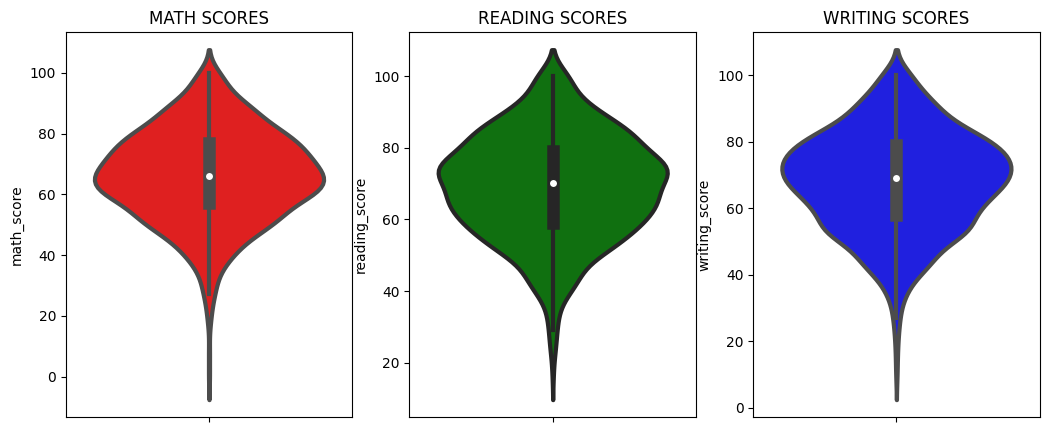

In [38]:
plt.figure(figsize=(17,5))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

- Insights 
    - Most of the students in maths varies between  60 - 80.
    - Most of the student in Reading and Writting varies in 50-80

# 4.3 Mutivariate Anaysis

(-1.25, 1.25, -1.25, 1.25)

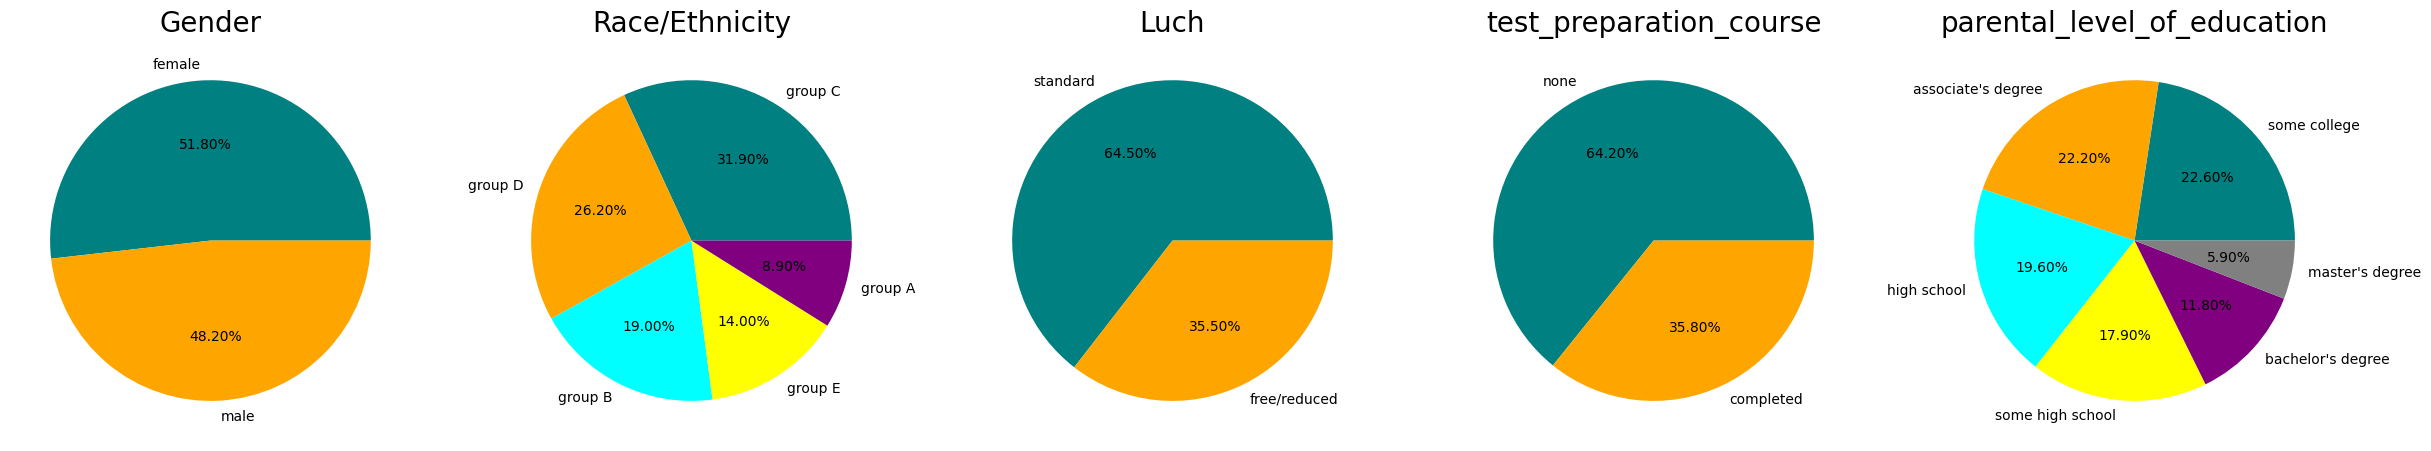

In [63]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = df['gender'].value_counts().index
color = ['teal','orange']

plt.pie(size, colors=color, labels=labels, autopct= "%.2f%%")
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = df['race_ethnicity'].value_counts().index
color = ['teal','orange', 'cyan', 'yellow', 'purple']

plt.pie(size, colors=color, labels=labels, autopct= "%.2f%%")
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = df['lunch'].value_counts().index
color = ['teal','orange']

plt.pie(size, colors=color, labels=labels, autopct= "%.2f%%")
plt.title('Luch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = df['test_preparation_course'].value_counts().index
color = ['teal','orange']

plt.pie(size, colors=color, labels=labels, autopct= "%.2f%%")
plt.title('test_preparation_course', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = df['parental_level_of_education'].value_counts().index
color = ['teal','orange', 'cyan', 'yellow', 'purple', 'gray']

plt.pie(size, colors=color, labels=labels, autopct= "%.2f%%")
plt.title('parental_level_of_education', fontsize = 20)
plt.axis('off')



- Insights
    - Male and Females are equal.
    - Group C Ethinicity students are in majority.
    - Students with standard lunch are greater in number.
    - Majority of students having test prepration course status as none.
    - Majority of parents are in category of some college or associate degree.

# 4.4 Feature wise Analysis
    4.4.1. Is gender has any impact on students Performance

In [71]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,Total Score,Average Score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


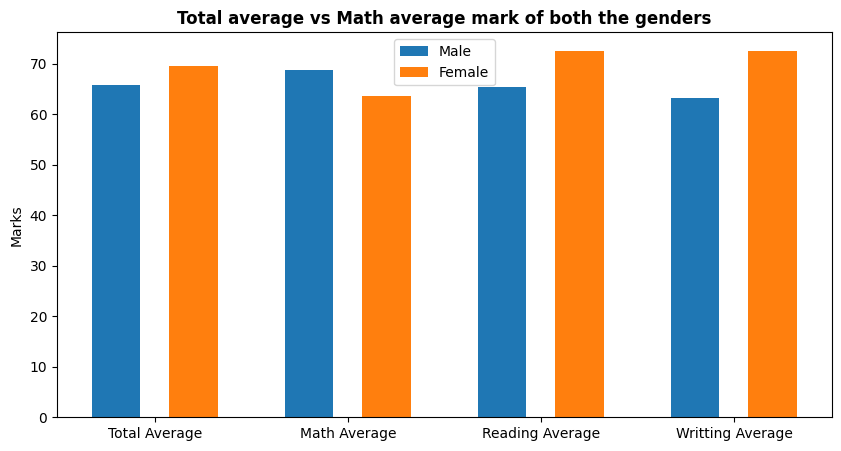

In [116]:
plt.figure(figsize=(10,5))
x = ['Total Average', 'Math Average', 'Reading Average', 'Writting Average']

female_score = gender_group.iloc[0, [4,0,1,2]].values
male_score = gender_group.iloc[1, [4,0,1,2]].values

x_axis = np.arange(len(x))

plt.bar(x_axis-0.2, male_score, width = 0.25, label= 'Male' )
plt.bar(x_axis+0.2, female_score,width = 0.25, label='Female')

plt.xticks(x_axis, x)
plt.ylabel('Marks')
plt.title('Total average vs Math average mark of both the genders', fontweight = 'bold')
plt.legend()
plt.show()

- Insights
    - As per Average Marks Female students are performing well as compared to male.
    - But if we see the Maths marks than Male students are performing well.

    4.4.2 Race/Ethnicity Column
        1. How is Group Distributed
        2. Is Race/Ethnicity has an impact on students Performance.

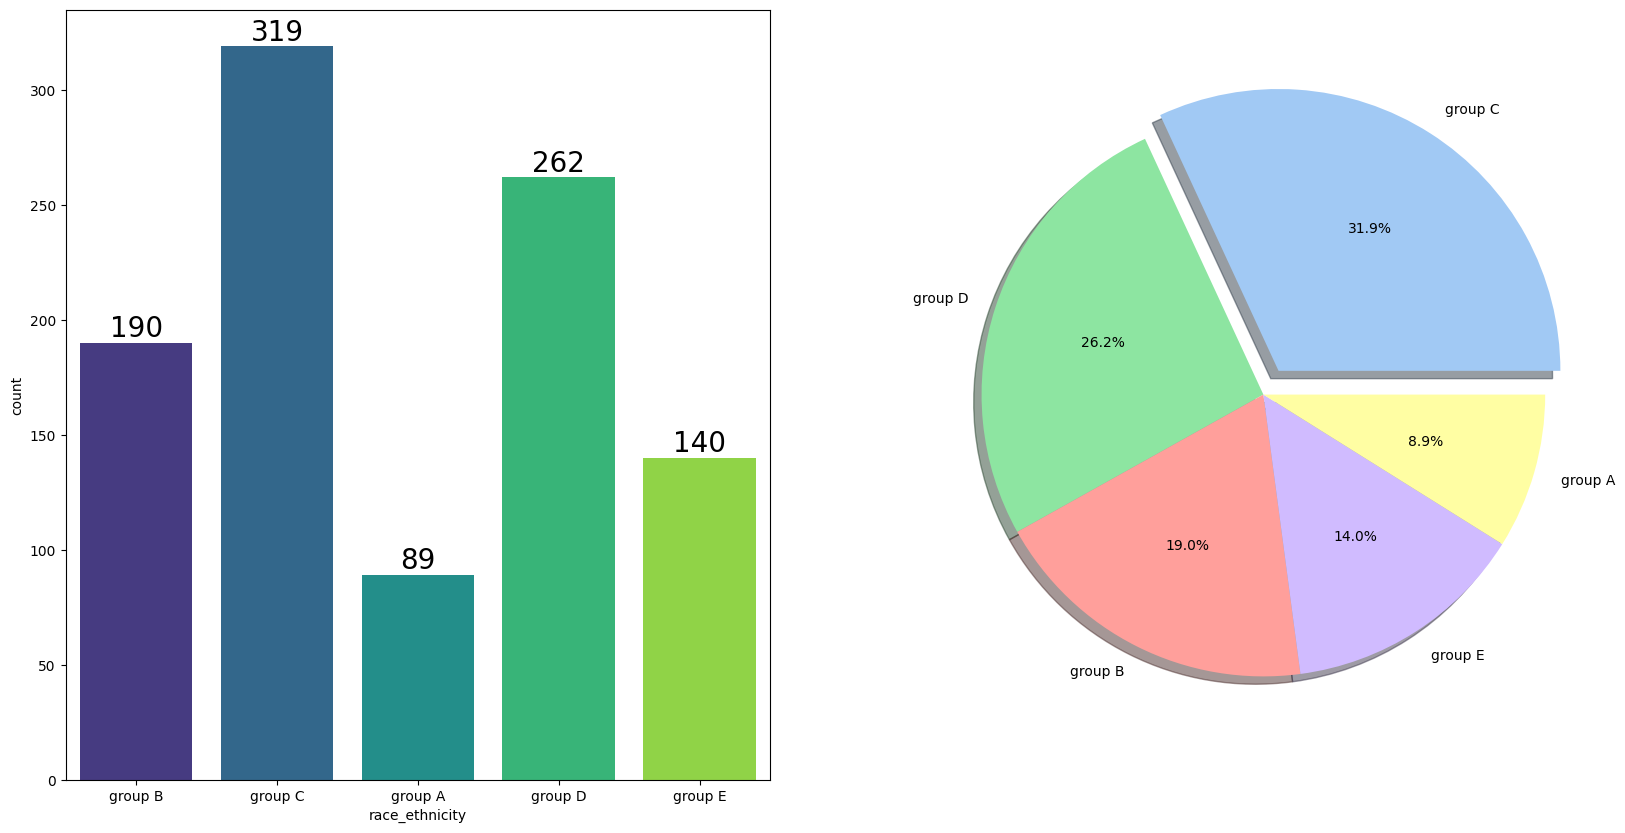

In [128]:
fig , ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x = df['race_ethnicity'], data=df, palette='viridis', ax = ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0], autopct='%1.1f%%', colors= sns.color_palette('pastel6'), shadow=True)
plt.show()

- Insight 
    - Most of the student belongs to Group C and D Respectively.
    - Lowest number of students belong to group A.


# Is Race/Ethnicity has any impact on student's performance?

Text(0.5, 1.0, 'Total Average Score')

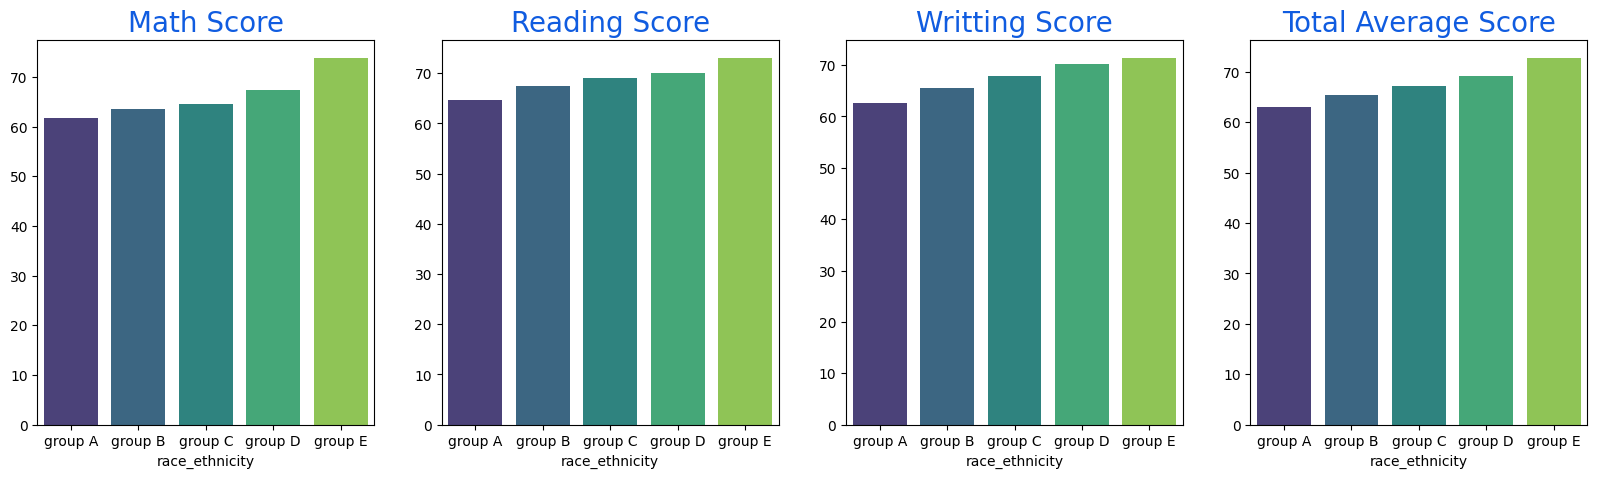

In [169]:
group_data = df.groupby('race_ethnicity').mean()
group_data
fig, ax = plt.subplots(1,4,figsize=(20,5))

# Math Score
x = group_data.iloc[:,0].index
y=group_data.iloc[:,0].values
sns.barplot(x=x,y=y, palette='viridis', ax=ax[0])
ax[0].set_title('Math Score',color='#105ce0',size=20)

# Reading score 
x = group_data.iloc[:,1].index
y=group_data.iloc[:,1].values
sns.barplot(x=x,y=y, palette='viridis', ax=ax[1])
ax[1].set_title('Reading Score',color='#105ce0',size=20)

# Writting Score
x = group_data.iloc[:,2].index
y=group_data.iloc[:,2].values
sns.barplot(x=x,y=y, palette='viridis', ax=ax[2])
ax[2].set_title('Writting Score',color='#105ce0',size=20)

# Writting Score
x = group_data.iloc[:,4].index
y=group_data.iloc[:,4].values
sns.barplot(x=x,y=y, palette='viridis', ax=ax[3])
ax[3].set_title('Total Average Score',color='#105ce0',size=20)

- Insight 
    - Group E Student are having highest marks in all three subjects.
    - Group A students have performed poorly in all subject.

# 4.4.3 Parental Education level
- Impact 
- Diversity

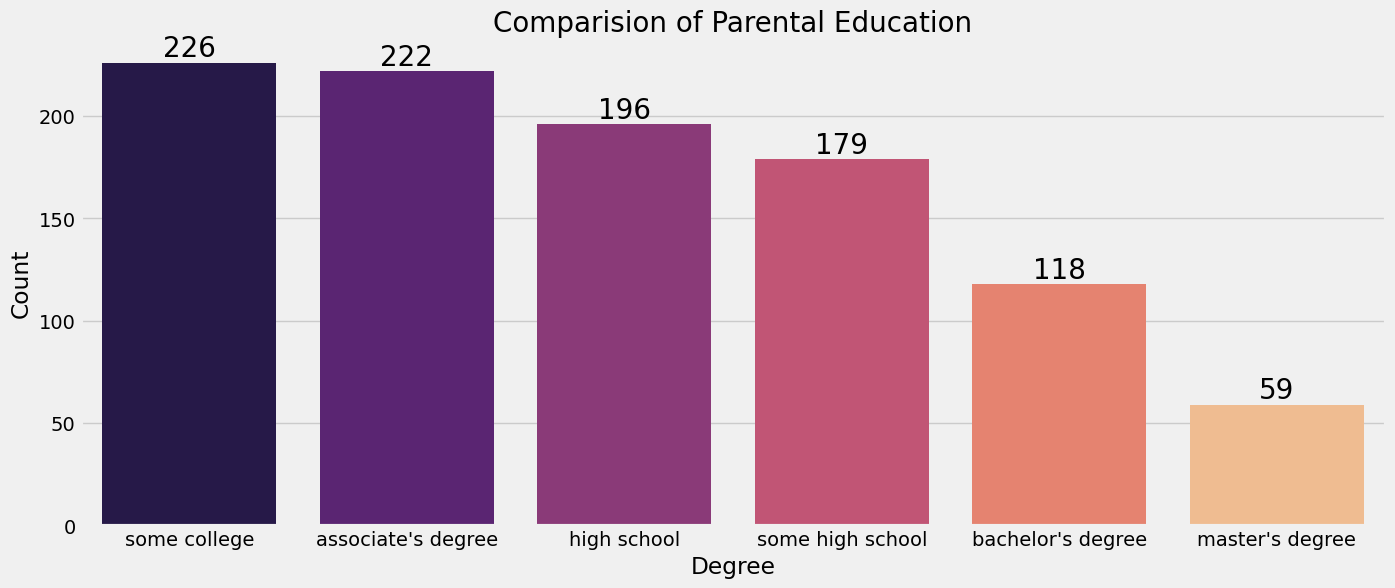

In [189]:
# Diversity
plt.rcParams['figure.figsize']=(15,6)
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=df['parental_level_of_education'].value_counts().index,y = df['parental_level_of_education'].value_counts().values, palette='magma')
for container in ax.containers:
    ax.bar_label(container, color='black', size=20)
plt.title('Comparision of Parental Education', fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

- Insight 
    - Majority of parents are having degree as Some College or Associate's Degree

# Is Parental Education has any impact on Students Performance?

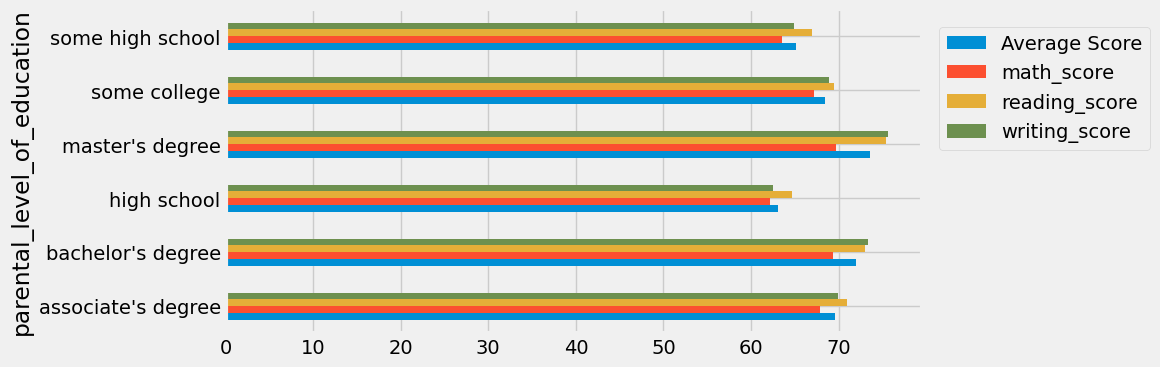

In [214]:
df.groupby('parental_level_of_education').mean().iloc[:, [4,0,1,2]].plot(kind='barh', figsize=(8,4))
plt.legend(bbox_to_anchor=(1,1), loc=2,borderaxespad=0.9)

- Insights 
    - Students whoes parents have bachelor or master degree are performing well as compared to others.

# 4.4.6 Checking Outlier


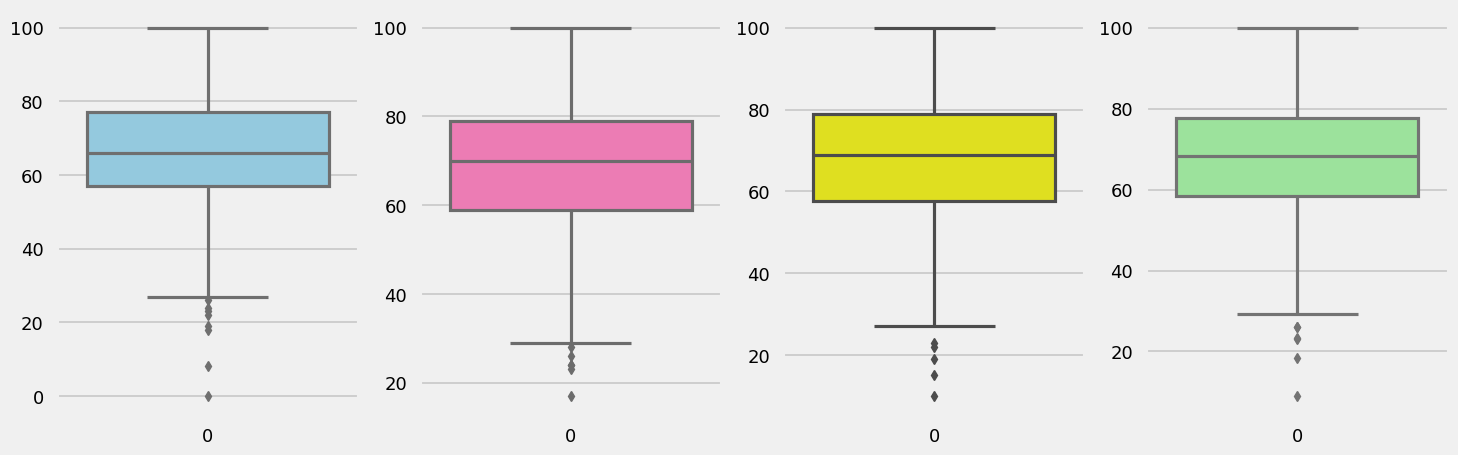

In [230]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average Score'],color='lightgreen')
plt.show()

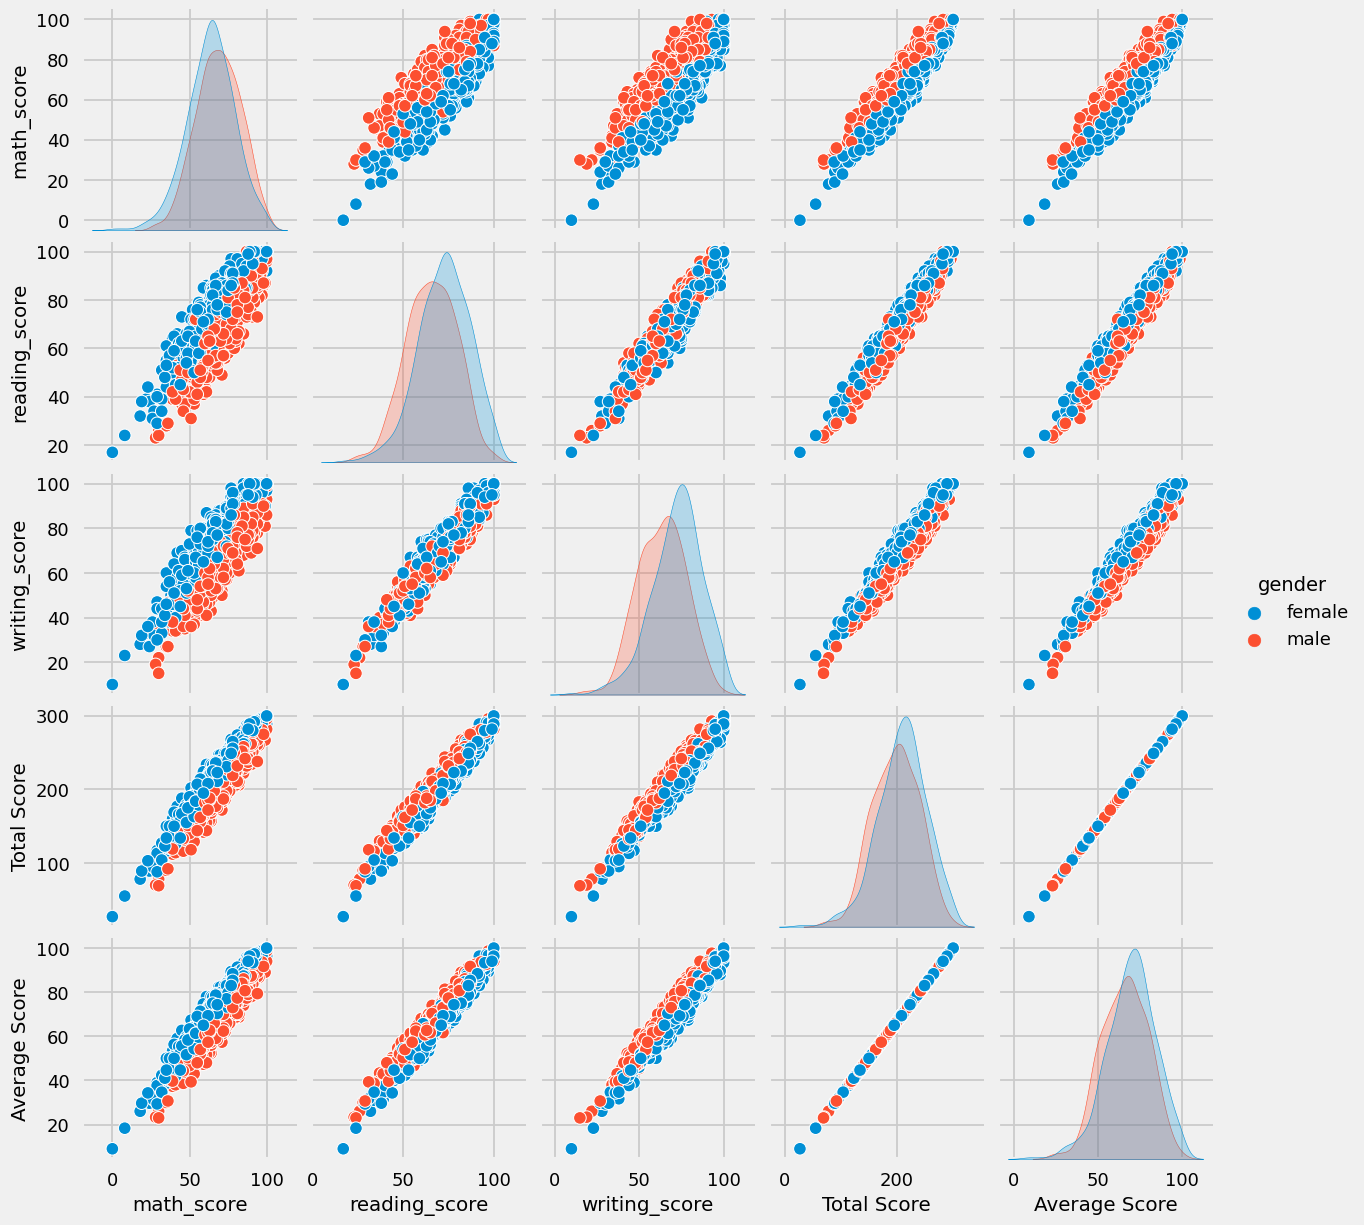

In [231]:
sns.pairplot(df, hue='gender')

# 5. Conclusion

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.